# Analyze Fitbit Data With Python and Pandas
First we import the data into a pandas dataframe. We set the Date column as the index (since this is a unique identifyer for every row in the dataset), and parse this column as a date.

In [20]:
import pandas as pd
steps = pd.read_csv("fitbit_steps.csv",index_col='Date',parse_dates=True)
sleep = pd.read_csv("fitbit_sleep.csv",index_col='Date',parse_dates=True,dtype={'Minutes Asleep': int})
# can improve how we read this in: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

## Steps Data
Let's take a look at the first few rows. The `head()` method will display the first 5 rows by default, but you can pass an integer to this method to secify a particular number of rows to view. Likewise, `tail()` will return the last 5 rows. 

In [2]:
steps.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2016-03-06,3647,21066,10.40,110,525,185,63,93,2115
2016-03-07,2872,12925,6.23,15,707,130,38,39,1209
2016-03-08,2837,11698,5.64,11,844,185,5,29,1176
2016-03-09,3032,11637,8.87,13,743,220,32,17,1427
2016-03-10,2882,12453,6.00,16,745,180,5,36,1238


The `dataframe.describe()` method provides some useful summary statistics:

In [3]:
steps.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2889.726257,9569.351955,4.687486,22.491620,835.525140,181.636872,21.329609,27.720670,1224.039106
std,490.516316,4713.578219,2.316243,48.411899,247.462704,76.891628,21.502489,29.980334,608.757515
min,1843.000000,0.000000,0.000000,0.000000,306.000000,0.000000,0.000000,0.000000,0.000000
25%,2691.500000,7242.000000,3.490000,8.000000,692.500000,161.500000,5.500000,6.500000,953.000000
50%,2917.000000,10139.000000,4.940000,15.000000,767.000000,198.000000,17.000000,21.000000,1278.000000
75%,3108.500000,12179.500000,5.905000,24.000000,897.500000,228.500000,29.000000,40.000000,1501.500000
max,4716.000000,34382.000000,16.580000,588.000000,1440.000000,340.000000,128.000000,186.000000,3507.000000


I know there are some days that I did not wear my Fitbit so no activity was recorded. Likewise, there may be some days where I only wore it for a small portion of the day. Let's look at all records with less than 1000 steps:

In [4]:
steps[steps.Steps < 1000]

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2016-05-12,1858,44,0.02,0,1042,5,0,0,16
2016-06-07,1843,0,0.00,0,1440,0,0,0,0
2016-06-08,1845,0,0.00,0,1440,0,0,0,0
2016-06-13,1843,0,0.00,0,1440,0,0,0,0
2016-06-14,1960,451,0.22,0,1311,8,4,10,141
2016-07-18,1872,113,0.05,0,1357,9,0,0,39
2016-07-23,1899,347,0.17,0,1046,13,0,0,65
2016-07-28,1843,0,0.00,0,1440,0,0,0,0
2016-07-29,1843,0,0.00,0,1440,0,0,0,0


As suspected, there are a number of records with no (or lacking) data. We will exclude these outliers. To verify they are no longer in the dataframe, we print out a few rows around 8/20/2016 that was removed.

Chris Albon has a great summary of [Indexing and Selecting Data With Pandas](http://chrisalbon.com/python/pandas_indexing_selecting.html)

In [5]:
steps = steps[steps.Steps > 1000]

steps.loc['2016-08-19':'2016-08-21']

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2016-08-19,2405,5257,2.53,17,864,148,4,7,702
2016-08-21,3213,16026,7.75,23,1094,175,51,75,1648


Likewise, we might have some outliers on the high end. We use the `sort_values` method to sort the Steps column (`ascending=[0]` to view the list in descending order), and we specify that we want to see the top 10 results in the `head` method.

In [6]:
steps.sort_values(['Steps'], ascending=[0]).head(10)

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2016-04-08,4716,34382,16.58,588,306,287,128,151,3507
2016-04-16,3770,22756,10.97,113,470,241,49,101,2341
2016-06-03,3835,21450,10.36,32,594,241,39,101,2388
2016-03-06,3647,21066,10.40,110,525,185,63,93,2115
2016-05-15,3402,17679,8.52,61,630,174,79,67,1876
2016-05-13,3719,17608,8.51,10,705,236,46,92,2236
2016-07-01,4694,16104,7.77,35,403,259,103,167,3416
2016-08-21,3213,16026,7.75,23,1094,175,51,75,1648
2016-05-01,3306,15953,7.69,34,530,223,71,35,1757


Taking a look here, the first entry looks like quite an outlier that may through some trending analysis off. Let's remove this entry.

In [7]:
steps = steps[steps.Steps < 30000]

### Adding A Summary Column
We notice that we have minutes sedentary and minutes active by various levels of activity. It might be useful to know *total* minutes active, so we create a new column that represents this value.

In [8]:
steps['Total Minutes Active'] = steps['Minutes Lightly Active'] + steps['Minutes Fairly Active'] + steps['Minutes Very Active']
steps.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Total Minutes Active
Date,,,,,,,,,,
2016-03-06,3647,21066,10.40,110,525,185,63,93,2115,341
2016-03-07,2872,12925,6.23,15,707,130,38,39,1209,207
2016-03-08,2837,11698,5.64,11,844,185,5,29,1176,219
2016-03-09,3032,11637,8.87,13,743,220,32,17,1427,269
2016-03-10,2882,12453,6.00,16,745,180,5,36,1238,221


Now that we have cleaned up our data and taken an initial look, let's take a quick peek at steps and floors visually.

Note that we include the `%matplotlib inline` command so that figures appear in the Jupyter notebook.

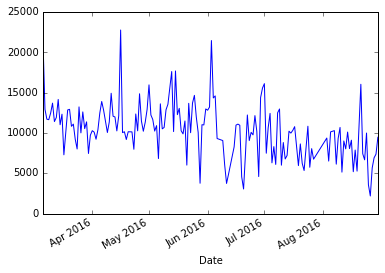

In [9]:
%matplotlib inline
import matplotlib
ts = steps['Steps']
ts.plot()
# improve plotting with this: http://earthpy.org/pandas-basics.html

### Secondary y-axis
If we want, we can include additional information, in this case the number of floors climbed. Since this is a much smaller number than steps, we will plot it on a secondary y-axis.

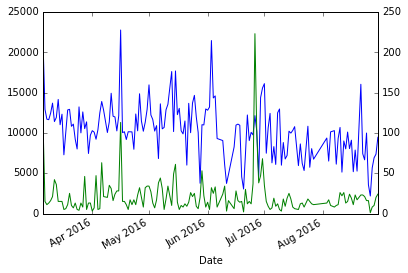

In [10]:
%matplotlib inline
steps.Steps.plot()
steps.Floors.plot(secondary_y=True)

### Scatter Matrix Plot
Pandas has a useful feature called Scatter Matrix Plot for visualizing linear correlations between variables in your dataframe. We select the columns (variables) to include. The `'kde'` diagonal gives us a density plot for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112511f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112d19550>]], dtype=object)

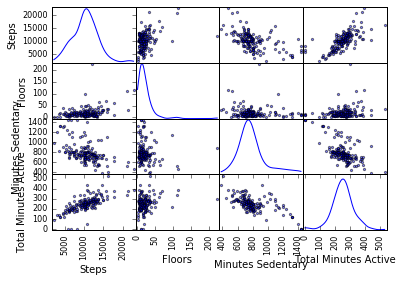

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(steps[['Steps', 'Floors', 'Minutes Sedentary', 'Total Minutes Active']], diagonal='kde')

## Sleep Data
Again, let's take a look at the first several rows to see what we are working with.

In [12]:
sleep.head()

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
Date,,,,
2016-03-06,560,33,1,593
2016-03-07,518,18,1,536
2016-03-08,423,23,0,452
2016-03-09,366,26,2,392
2016-03-10,405,65,0,478


In [13]:
sleep.describe()

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
count,179.000000,179.000000,179.000000,179.000000
mean,339.262570,33.335196,1.335196,374.167598
std,172.025224,20.285032,1.348924,189.398886
min,0.000000,0.000000,0.000000,0.000000
25%,343.500000,23.000000,0.000000,377.500000
50%,405.000000,36.000000,1.000000,446.000000
75%,437.000000,46.000000,2.000000,481.000000
max,662.000000,91.000000,5.000000,728.000000


Similar to before, there seem to be some days without data or with incomplete data. Let's take a look at all days with less than 120 minutes (2 hours) of Minutes Asleep.

This brings up an interesting point about the various ways to select data in Pandas. Note that previously, we used `steps[steps.Steps < 1000]` to filter by entries with less than 1000 steps. Unfortunately, we can't use this same syntax for Minutes Asleep because there is a space in the column name, so we modify the syntax slightly. 

In [14]:
sleep[sleep['Minutes Asleep'] < 120]

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed
Date,,,,
2016-05-06,0,0,0,0
2016-05-19,0,0,0,0
2016-05-20,68,2,1,70
2016-05-21,0,0,0,0
2016-05-24,0,0,0,0
2016-05-28,0,0,0,0
2016-05-29,104,6,0,110
2016-06-07,0,0,0,0
2016-06-08,0,0,0,0


In [21]:
sleep = sleep[sleep['Minutes Asleep' > 120]]

#sleep.loc['2016-07-23':'2016-08-04']

TypeError: unorderable types: str() > int()